## MULTIPLE LINEAR REGRESSION

Assignment Task:
Your task is to perform a multiple linear regression analysis to predict the price of Toyota corolla based on the given attributes.

Dataset Description:
The dataset consists of the following variables:
Age: Age in years
KM: Accumulated Kilometers on odometer
FuelType: Fuel Type (Petrol, Diesel, CNG)
HP: Horse Power
Automatic: Automatic ( (Yes=1, No=0)
CC: Cylinder Volume in cubic centimeters
Doors: Number of doors
Weight: Weight in Kilograms
Quarterly_Tax: 
Price: Offer Price in EUROs

### Step 1: Exploratory Data Analysis (EDA)

In [29]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
# Load the dataset
df = pd.read_csv('ToyotaCorolla - MLR.csv')
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [31]:
# Data structure and missing values
print("Data shape:", df.shape)
print("Data columns:", df.columns)

Data shape: (1436, 11)
Data columns: Index(['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc',
       'Doors', 'Cylinders', 'Gears', 'Weight'],
      dtype='object')


In [32]:
print("Missing values:", df.isnull().sum())

Missing values: Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64


In [33]:
# Summary statistics for numerical columns
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


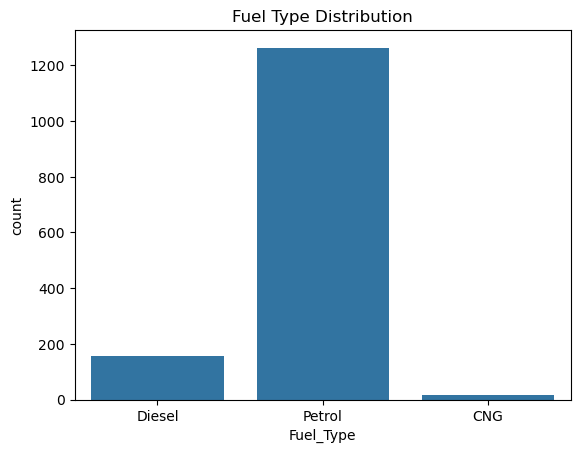

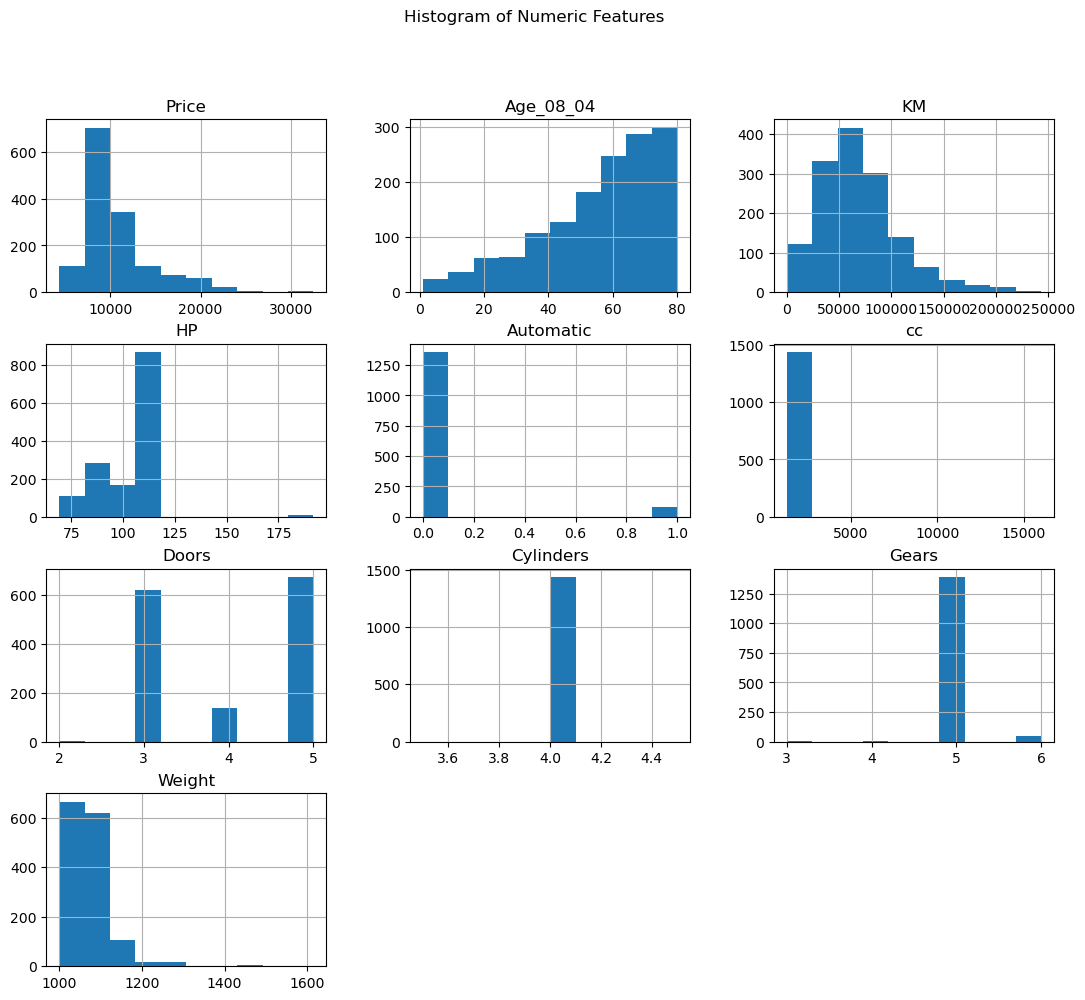

In [34]:
# Count plot and distribution for categorical variables, histograms for numerics
sns.countplot(data=df, x='Fuel_Type')
plt.title('Fuel Type Distribution')
plt.show()

df.hist(figsize=(13,11))
plt.suptitle('Histogram of Numeric Features')
plt.show()

### Step 2: Data Preprocessing

In [35]:
# Encode 'FuelType' using pandas get_dummies (one-hot encoding)
df = pd.get_dummies(df, columns=['Fuel_Type'], drop_first=True)
# Checking for missing values and handling
df.fillna(df.median(numeric_only=True), inplace=True)
# Feature selection
predictors = df.drop('Price', axis=1)
target = df['Price']

In [36]:
df.head()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,2000,3,4,5,1165,True,False
1,13750,23,72937,90,0,2000,3,4,5,1165,True,False
2,13950,24,41711,90,0,2000,3,4,5,1165,True,False
3,14950,26,48000,90,0,2000,3,4,5,1165,True,False
4,13750,30,38500,90,0,2000,3,4,5,1170,True,False


### Step 3: Train-Test Split
Splitting the data into training (80%) and testing (20%) sets for unbiased model evaluation.

In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=42)

In [38]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1148, 11)
(1148,)
(288, 11)
(288,)


### Step 4: Build Multiple Linear Regression Models
We will build at least three different regression models and interpret the coefficients.

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Model 1: All predictors
model1 = LinearRegression()
model1.fit(x_train, y_train)
y_pred1 = model1.predict(x_test)

# Model 2: Select important predictors
corrs = df.corr()['Price'].abs().sort_values(ascending=False)
important_features = corrs.index[1:7] # Top 6 features (excluding 'Price')
model2 = LinearRegression()
model2.fit(x_train[important_features], y_train)
y_pred2 = model2.predict(x_test[important_features])

# Model 3: Add interaction term
x_train_inter = x_train.copy()
x_train_inter['Age_KM'] = x_train['Age_08_04'] * x_train['KM']
x_test_inter = x_test.copy()
x_test_inter['Age_KM'] = x_test['Age_08_04'] * x_test['KM']
model3 = LinearRegression()
model3.fit(x_train_inter, y_train)
y_pred3 = model3.predict(x_test_inter)

In [40]:
# Function to print model coefficients
def print_coef(model, features):
    coef_df = pd.DataFrame({'Feature': features, 'Coefficient': model.coef_})
    print(coef_df)

print("Model 1 Coefficients:")
print_coef(model1, x_train.columns)

print("Model 2 Coefficients:")
print_coef(model2, important_features)

print("Model 3 Coefficients:")
print_coef(model3, x_train_inter.columns)

Model 1 Coefficients:
             Feature   Coefficient
0          Age_08_04 -1.208305e+02
1                 KM -1.623141e-02
2                 HP  1.403948e+01
3          Automatic  1.488309e+02
4                 cc -3.037219e-02
5              Doors -6.031097e+01
6          Cylinders  3.694822e-13
7              Gears  5.516007e+02
8             Weight  2.588496e+01
9   Fuel_Type_Diesel -6.854876e+01
10  Fuel_Type_Petrol  1.370809e+03
Model 2 Coefficients:
     Feature  Coefficient
0  Age_08_04  -119.956310
1     Weight    20.206584
2         KM    -0.020114
3         HP    29.272278
4      Doors   -22.339878
5         cc    -0.102012
Model 3 Coefficients:
             Feature   Coefficient
0          Age_08_04 -1.494634e+02
1                 KM -5.107942e-02
2                 HP  1.837156e+01
3          Automatic  2.568033e+02
4                 cc -5.091169e-02
5              Doors -4.421378e+01
6          Cylinders  5.684342e-13
7              Gears  6.197791e+02
8             Wei

### Step 5: Model Evaluation
Performance metrics: R^2 score, Root Mean Squared Error (RMSE), and Mean Absolute Error (MAE).

In [41]:
from sklearn.metrics import mean_absolute_error
def evaluate(y_true, y_pred, model_name):
    print(model_name)
    print("R^2:", r2_score(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("-"*30)
evaluate(y_test, y_pred1, "Model 1: All Predictors")
evaluate(y_test, y_pred2, "Model 2: Important Predictors")
evaluate(y_test, y_pred3, "Model 3: Interaction Term")

Model 1: All Predictors
R^2: 0.8348888040611082
RMSE: 1484.2654153296517
MAE: 990.8872739193927
------------------------------
Model 2: Important Predictors
R^2: 0.8506135922367156
RMSE: 1411.8184355307994
MAE: 996.0685901850447
------------------------------
Model 3: Interaction Term
R^2: 0.8621657410005832
RMSE: 1356.131783145473
MAE: 940.7921322407253
------------------------------


### Step 6: Lasso & Ridge Regularization

In [42]:
from sklearn.linear_model import Lasso, Ridge

# Lasso Regression
lasso = Lasso(alpha=1.0)
lasso.fit(x_train, y_train)
y_pred_lasso = lasso.predict(x_test)
evaluate(y_test, y_pred_lasso, "Lasso Regression")

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(x_train, y_train)
y_pred_ridge = ridge.predict(x_test)
evaluate(y_test, y_pred_ridge, "Ridge Regression")

Lasso Regression
R^2: 0.8354626403967388
RMSE: 1481.6839224634045
MAE: 990.9546616159037
------------------------------
Ridge Regression
R^2: 0.8351359377712331
RMSE: 1483.154196377891
MAE: 990.733834202601
------------------------------


### Interview Questions

#### 1.What is Normalization & Standardization and how is it helpful?
- Normalization scale data between 0 and 1,which is useful when features have different scales.
- Standardization converts data to have mean 0 and a standard deviation of 1.
- They help make features comparable so that no variable dominates others.
- Both help improve model convergence and performance, and ensure that regularization penalties are fairly distributed across all variables.

#### 2.What techniques can be used to address multicollinearity in multiple linear regression?
Methods include:
- Remove one of the highly correlated variables.
- Combine correlated variables into a single feature.
- Use Ridge or Lasso regression to reduce the effect of correlated predictors.
- Apply PCA (Principal Component Analysis) to create new uncorrelated variables.
- Check VIF (Variance Inflation Factor) to detect multicollinearity first

Assumptions & Implications
- Missing values are assumed to be filled using the median method.
- The model assumes there is a linear relationship between variables, with normally distributed errors and constant variance (homoscedasticity).
- If these assumptions are not met, the model’s accuracy and reliability may decrease.
- Proper data preprocessing or using regularization techniques can help reduce these issues.